In [150]:
from random import random
from math import log, exp, erf, sqrt
import numpy as np
import matplotlib.pyplot as plt
from bisect import bisect_right
%matplotlib inline

#### Task1. Осуществить моделирование n = 1000 реализаций СВ из нормального закона распределения N(m, $s^2$) с заданными параметрами. Вычислить несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными.

Задача моделирования $\xi \sim N(\mu, \sigma^2)$   сводится к моделированию стандартной гаусовской СВ $\eta$  и применению формулы: $$\xi=\mu + \sigma \cdot \eta$$ 

Алгоритм моделирования $\eta \sim N(0,1)$:
* моделирование N = 12 реализаций $a_1,...,a_{12}$ БСВ;
* принятие решения о том, что реализацией СВ $\eta$ является величина x, равная $$x=\sum_{i=1}^{12}a_i - 6$$

Cumulative distribution function of gauss distribution: $$F_{\xi}(x) = \frac{1}{2} (1 + erf\left(\frac{x - \mu}{\sigma \sqrt{2}}\right) ),$$ erf - error function of Laplace

In [8]:
n = 1000
m = 1
s_2 = 9

In [15]:
def standard_gauss_modeling():
    return sum([random() for _ in range(12)]) - 6

In [16]:
def get_gauss_val(m, s):
     return m + s * standard_gauss_modeling()

In [127]:
def gauss_distribution_modeling(m, s, n):
    for _ in range(n):
        yield get_gauss_val(m, s)

In [128]:
def gauss_cdf(mu, s, x):
    return 0.5 * (1 + erf((x - mu) / (s * sqrt(2))))

In [35]:
gauss_seq = list(gauss_distribution_modeling(m, s_2 ** 0.5, n))

Text(0, 0.5, '$pdf$')

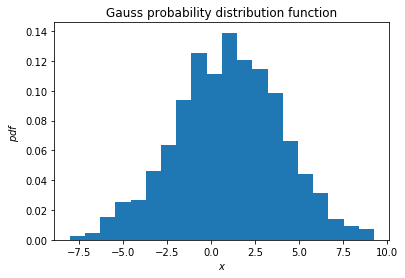

In [36]:
plt.hist(gauss_seq, bins = 20, density=True)

plt.title('Gauss probability distribution function')
plt.xlabel('$x$')
plt.ylabel('$pdf$')

Unbiased estimate of mathematical expectation of random variable:
$$Unbiased\_estimate\_of\_math\_expectation = \frac{ \sum_{i=1}^n X_i }{ n }$$

Unbiased variance estimate:
$$Unbiased\_variance\_estimate=\frac{ \sum_{i=1}^n (X_i - Unbiased\_estimate\_of\_math\_expectation)^{2}}{ n-1 }$$

In [37]:
#count unbiased estimate of math expectation
def uemef(random_var_seq):
    return sum(random_var_seq) / len(random_var_seq)

In [38]:
#count unbiased variance estimate
def uvef(random_var_seq, ueme):
    n = len(random_var_seq)
    return sum((rand_var - ueme)**2 for rand_var in random_var_seq) / (n - 1)

In [39]:
print("Gauss distribution")
print("Theoretic : E = {}, D = {}".format(m, s_2))
print("Actual : E = {}, D = {}".format(uemef(gauss_seq), uvef(gauss_seq, uemef(gauss_seq))))

Gauss distribution
Theoretic : E = 1, D = 9
Actual : E = 0.985809989726455, D = 8.885130207031425


#### Task2. Смоделировать n = 1000 СВ из заданных абсолютно непрерывных распределений. Вычислить несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями (если это возможно).

In [44]:
m = 1
s_2 = 9

### Логнормальное распределение
Алгоритм моделирования $\xi\sim LN(m, \sigma)$ основан на методе функциональных преобразований и состоит из следующих шагов:
1.	Моделирование z реализации стандартной гаусовской СВ.
2.	Получение $y$ реализацией СВ $\eta\sim N(\mu,\sigma^2)$ (где $\mu=\ln{m}$) по формуле: $$y=\mu + \sigma \cdot z$$
3. Вычисление реализации x СВ $\xi\sim LN(m, \sigma)$ по формуле: $$x=exp\{y\}$$

Mathematical expectation and variance of lognormal distribution: $$E_{\xi}=m\sqrt{e^{\sigma^2}}$$ $$D_{\xi}=m^2e^{\sigma^2}(e^{\sigma^2}-1)$$

Cumulative distribution function of lognormal distribution: $$F_{\xi}(x) = \frac{1}{2} + \frac{1}{2} erf\left(\frac{\ln(x) - \ln(\mu)}{\sigma \sqrt{2}}\right),$$ erf - error function of Laplace

In [51]:
def get_lognormal_val(m, s):
    mu = log(m)
    y = get_gauss_val(mu, s)
    return exp(y)

In [124]:
def lognormal_distribution_modeling(m, s, n):
    for _ in range(n):
        yield get_lognormal_val(m, s)

In [141]:
def lognormal_cdf(mu, s, x):
    return 0.5 + 0.5 * erf((log(x) - log(mu)) / (s * sqrt(2)))

### Экспоненциальное распределение
Алгоритм моделирования СВ $\xi \sim E(\lambda)$ основан на методе обратной функции. Обратная функция для $F_{\xi}(x)$, определяемой как $$F_{\xi}(x)=1-e^{-\lambda x},$$ находится при решении  уравнения  относительно x: $$x=F_{\xi}^{-1}(y)=-\ln{(1-y)/\lambda} \quad (1)$$
Далее в соответствии с методом обратной функции алгоритм моделирования СВ  состоит из двух шагов:
1.	Моделирование реализации a БСВ a.
2.	Вычисление в соответствии с (1) реализации x СВ $\xi$: $$x=-\frac{1}{\lambda}\ln{a}$$
 
где учтено, что a и a-1 одинаково распределены.  
Коэффициент использования БСВ к=1.


Mathematical expectation and variance of exponential distribution: $$E_{\xi}=\frac{1}{\lambda} \quad D_{\xi}=\frac{1}{\lambda^2}$$

Cumulative distribution function of exponential distribution: $$F_{\xi}(x)=1-e^{-\lambda x}$$

In [59]:
lambda_val = 2

In [60]:
def exponential_val(lambda_val):
    return -(1 / lambda_val) * log(random())

In [125]:
def exponential_distribution_modeling(lambda_val, n):
    for _ in range(n):
        yield exponential_val(lambda_val)

In [176]:
def exponential_cdf(lambda_val, x):
    return 1 - exp(-lambda_val * x)

Now we will find sequences of random variables

In [119]:
lognormal_seq = list(lognormal_distribution_modeling(m, s_2 ** 0.5, n))
exponential_seq = list(exponential_distribution_modeling(lambda_val, n))

Count theoretic E and D

In [120]:
lognormal_theoretic_math_exp = m * exp(s_2) ** 0.5
lognormal_variance = m ** 0.5 * exp(s_2) * (exp(s_2) - 1)

In [121]:
exponential_theoretic_math_exp = 1 / lambda_val
exponential_variance = 1 / lambda_val ** 2

In [122]:
print("Lognormal distribution")
print("Theoretic : E = {}, D = {}".format(lognormal_theoretic_math_exp, lognormal_variance))
print("Actual : E = {}, D = {}".format(uemef(lognormal_seq), uvef(lognormal_seq, uemef(lognormal_seq))))

print()

print("Exponential distribution")
print("Theoretic : E = {}, D = {}".format(exponential_theoretic_math_exp, exponential_variance))
print("Actual : E = {}, D = {}".format(uemef(exponential_seq), uvef(exponential_seq, uemef(exponential_seq))))

Lognormal distribution
Theoretic : E = 90.01713130052181, D = 65651866.05340294
Actual : E = 48.73227230084244, D = 169857.70928422618

Exponential distribution
Theoretic : E = 0.5, D = 0.25
Actual : E = 0.489289833419454, D = 0.23882525336318192


#### Task3. Для каждой из случайных величин построить свой критерий Колмогорова с уровнем значимость ε=0.05. Проверить, что вероятность ошибки I рода стремится к 0.05.

### Критерий согласия Колмогорова
Критерий Колмогорова-Смирнова используется для проверки гипотезы $H_0$: "случайная величина X имеет распределение F(x)".
Статистика, называемая расстоянием Колмогорова между $\hat{F_\xi}(\cdot)$ и $F_0(\cdot)$: $$D_n=sup_{x\in R^1}|\hat{F_\xi}(x)-F_0(x)|$$

delta https://helpstat.ru/raspredelenie-statistiki-kolmogorova/

In [102]:
delta = 1.358

In [139]:
def kolmogorov(random_values, delta):
        
    n = len(random_values)

    empirical = sorted(random_values)
 
    test_seq = np.array([float(i + 1) / n for i in range(n)])
    max_diff = max(list(map(abs, test_seq - empirical)))
    value = sqrt(n) * max_diff
    
    print("Kolmogorov result = {}, delta = {}".format(value, delta))
    return value < delta    

Kolmogorov check:

In [136]:
gauss_cdf_seq = [gauss_cdf(m, sqrt(s_2), x) for x in gauss_seq] 
kolmogorov(gauss_cdf_seq, delta)

Kolmogorov result = 0.43667471410181186, delta = 1.358


True

In [143]:
lognormal_cdf_seq = [lognormal_cdf(m, sqrt(s_2), x) for x in lognormal_seq]
kolmogorov(lognormal_cdf_seq, delta)

Kolmogorov result = 0.9925440970420258, delta = 1.358


True

In [144]:
exponential_cdf_sql = [exponential_cdf(x, lambda_val) for x in exponential_seq]
kolmogorov(exponential_cdf_sql, delta)

Kolmogorov result = 0.7415350391737736, delta = 1.358


True

#### Task4. Для каждой из случайных величин построить свой χ2-критерий Пирсона с уровнем значимости ε=0.05. Проверить, что вероятность ошибки I рода стремится к 0.05.

Распределение $\chi^2$ (хи-квадрат) с n степенями свободы — это распределение суммы квадратов n независимых стандартных нормальных случайных величин. http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

Критерий Пирсона используется для проверки гипотезы $H_0$: "случайная величина X имеет распределение F(x)".

http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82

Гипотетические вероятности попадания значений $\xi$ в ячейки гистограммы при истинной гипотезе $H_0$ и полностью заданной функции $F_0(x)$ равны: $$p_k = P\{\xi \in [x_{k-1}, x_k)\} = F_0(x_k) - F_0(x_{k-1}), k = \overline{1, K},$$
где $\{x_l\}(l=\overline{0, K})$ - границы ячеек гистограммы

Статистика критерия хи-квадрат: $$\chi^2=\sum_{i=1}^K \frac{\left(n_i- np_i\right)^2}{np_i}$$

In [145]:
K = 10 #число ячеек гистограммы
delta_005_10 = 16.919

In [266]:
def count_frequencies(random_seq, K):
    
    min_el = min(random_seq)
    max_el = max(random_seq)
    
    step = (max_el - min_el) / K
    intervals_values = np.arange(min_el, max_el + step, step) #(max_el + step) is not included
    
    frequencies = [0] * K
    
    sorted_random_seq = sorted(random_seq)
    
    last_position = 0
    for i in range(K):
        position = bisect_right(sorted_random_seq, intervals_values[i + 1]) #obtain position of insertion
        frequencies[i] = position - last_position
        last_position = position
        
    return frequencies, intervals_values

In [269]:
def count_probabilities(intervals_values, cdf, *args):
    k = len(intervals_values)
    p = [0] * (k - 1)
    
    for i in range(k - 1):
        p[i] = cdf(*args, intervals_values[i + 1]) - cdf(*args, intervals_values[i])
        
    return p

In [280]:
def pearson(frequencies, p, n, K, delta):
    chi_2 = sum([(frequencies[i] - n * p[i]) ** 2 / (n * p[i]) for i in range(K)])
    print("chi_2 = {}, delta = {}".format(chi_2, delta))
    return chi_2 < delta

Pearson check:

In [291]:
gauss_frequencies, gauss_interval_values = count_frequencies(gauss_seq, K)
gauss_p = count_probabilities(gauss_interval_values, gauss_cdf, m, s_2 ** 0.5)
pearson(gauss_frequencies, gauss_p, n, K, delta_005_10)

chi_2 = 6.22120229826604, delta = 16.919


True

In [292]:
gauss_frequencies

[6, 35, 63, 136, 204, 224, 184, 95, 39, 13]

In [293]:
lognormal_frequencies, lognormal_interval_values = count_frequencies(lognormal_seq, K)
lognormal_probabilities = count_probabilities(lognormal_interval_values, lognormal_cdf, m, s_2 ** 0.5)
pearson(lognormal_frequencies, lognormal_probabilities, n, K, delta_005_10)

chi_2 = 9.66462293536322, delta = 16.919


True

In [294]:
exponential_frequencies, exponential_interval_values = count_frequencies(exponential_seq, K)
exponential_probabilities = count_probabilities(exponential_interval_values, exponential_cdf, lambda_val)
pearson(exponential_frequencies, exponential_probabilities, n, K, delta_005_10)

chi_2 = 9.861256040090268, delta = 16.919


True